In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
%matplotlib inline
import glob

In [35]:
import udacity
import lane_line_finding
import warnings
warnings.filterwarnings('ignore')

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Functions

In [37]:
def remove_ticks(axes):
    for ax in axes:
        ax.set_yticks([])
        ax.set_xticks([])

# Figures for the writeup

## Calibration

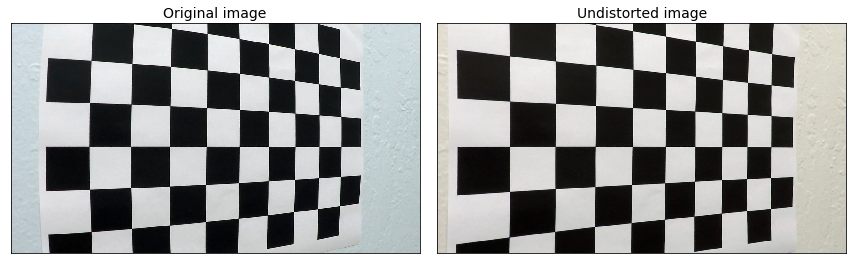

In [38]:
fn = "camera_cal/calibration5.jpg"
cal_fns = glob.glob("camera_cal/calibration??.jpg")

cal = lane_line_finding.Calibration(9, 6)
cal.calibrate_camera_from_filenames(cal_fns, "")

img = cal.undistort_image_from_filename(fn, "")


f, axes = plt.subplots(1, 2, figsize=[12, 6])
axes[0].imshow(cv2.imread(fn))
axes[0].set_title("Original image", fontsize=14)

axes[1].imshow(img)
axes[1].set_title("Undistorted image", fontsize=14)

remove_ticks(axes)
plt.tight_layout()    
plt.savefig("./writeup_images/calibration_undistorted.png", bbox_inches='tight')
plt.show()

## Pipeline test images

### Undistorted camera image

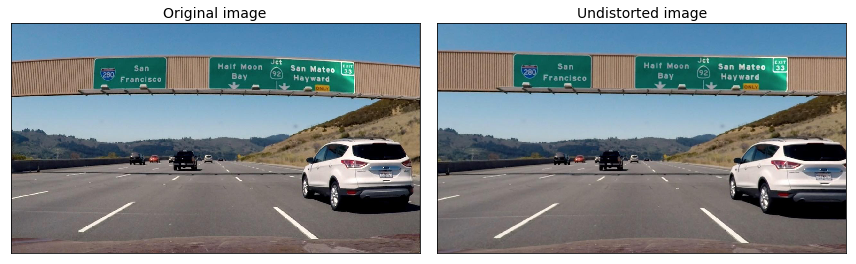

In [39]:
original_img = mpimg.imread("test_images/signs_vehicles_xygrad.png")
undistorted_img = cal.undistort_image(original_img)

f, axes = plt.subplots(1, 2, figsize=[12, 6])

axes[0].imshow(original_img)
axes[0].set_title("Original image", fontsize=14)

axes[1].imshow(undistorted_img)
axes[1].set_title("Undistorted image", fontsize=14)

remove_ticks(axes)
plt.savefig("./writeup_images/dashcam_undistorted.png", bbox_inches='tight')
plt.tight_layout()

### Debug video still

In [7]:
def extract_one_in_n_images(vid_fn, n, fn_formatter):
    vidcap = cv2.VideoCapture(vid_fn)
    success, image = vidcap.read()
    count = 0
    while success:
        if count % n == 0:
            cv2.imwrite(fn_formatter.format(count), image)
        success,image = vidcap.read()
        count += 1

In [8]:
# fn = "170527_0.5.1-no-smoothing_project_video.mp4"
# n = 10
# output_fn = "../debug_video_stills/{:04d}.jpg"
# extract_one_in_n_images(fn, n, output_fn)

The image to use is: `../debug_video_stills/0730.jpg`

![](../debug_video_stills/0730.jpg)

### Perspective transform

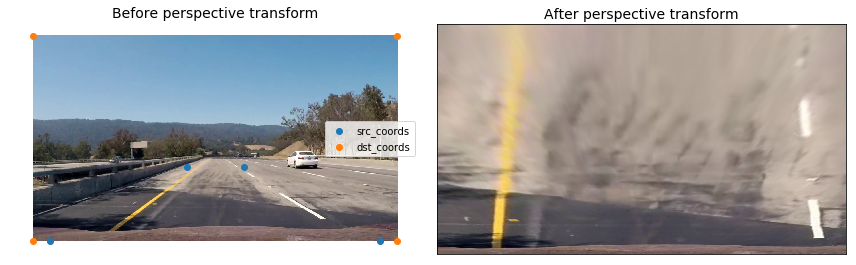

In [32]:
fn = "../project_video_stills/0550.jpg"
img = mpimg.imread(fn)

f, axes = plt.subplots(1, 2, figsize=[12,5])

pt = lane_line_finding.PerspectiveTransform.create_perspective_transform(0, 0, 0)
pt.plot_coords(img, axes[0])
axes[0].legend()
axes[0].axis('off')
axes[0].set_title("Before perspective transform", fontsize=14)

transformed = pt.transform_image(img)
axes[1].imshow(transformed)
axes[1].set_title("After perspective transform", fontsize=14)

remove_ticks(axes)
plt.tight_layout()
plt.savefig("./writeup_images/perspective_transform.png")